# PySeison - Tutorial 6: Validation class

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. PySeidon - Validation object initialisation

"Validation class" is a hybrid class which requires both a numerical-model-based object (e.g. "FVCOM" or "Station" object) and at least one measurement-based object (e.g. "ADCP", "TideGauge" or "Drifter" object or a list of their combination). Its aim is to provide validation benchmarks in order to access the accuracy of a FVCOM simulation compared to matching measurements.

### 1.1. Package importation

As any other library in *Python*, PySeidon has to be first imported before to be used. Here we will use an alternative *import* statement compared to the one previoulsy presented:  

In [2]:
from pyseidon import *

*** Star *** here means *all*. Usually this form of statements would import the entire library. In the case of *PySeidon*, this statement will import the following object classes: FVCOM, Station, Validation, ADCP, Tidegauge and Drifter. Only the Validation class will be tackle in this tutorial.

### 1.2. Object definition

*Python* is by definition an [**object oriented language**](http://www.tutorialspoint.com/python/python_classes_objects.htm)...and so is *matlab*. *PySeidon* is based on this notion of object, so let us define our first "Validation" object.

***Exercise 1: ***
- Unravel Drifter documentation with Ipython ***shortcuts***

***Answer: ***

In [3]:
Validation?

According to the documentation, in order to define a Validation object, the required inputs are:
- standalone or tuple of PySeidon measurement object (e.g. ADCP, TideGauge, Drifter)
- a PySeidon simulation object (i.e. FVCOM or Station)

**Note** that, ***flow*** option permits to impose flow comparison by surface flow ('sf'), depth-averaged flow ('daf') or at any depth (float). If this option is not provided, the option choice will be prompted to the user. 

***Exercise 2: ***
- Initialize adcp, tidegauge and drifter objects from the templates provided in **./data4tutorial/drifter_GP_01aug2013.mat**
- ***Tip:*** adapt the file's path to your local machine.
- Initialize station and fvcom objects from the following opendap urls: http://ecoii.acadiau.ca/thredds/dodsC/ecoii/test/Station3D_dngrid_BF_20130730_20130809.nc and http://ecoii.acadiau.ca/thredds/dodsC/ecoii/test/FVCOM3D_dngrid_GP_20130801_20130802.nc
- Initialize ***val1***, a Validation object using as input the adcp object and the station object
- Initialize ***val2***, a Validation object using as input a list of all the measurement objects and the FVCOM object and 'flow' option to 'daf'.
- Initialize ***val3***, a Validation object using as input a list of all the measurement objects and the FVCOM object and 'flow' option to 5.0.

***Answer: ***

In [4]:
drift = Drifter('./data4tutorial/drifter_GP_01aug2013.mat')
adcp = ADCP('./data4tutorial/adcp_GP_01aug2013.mat')
tg = TideGauge('./data4tutorial/tidegauge_GP_01aug2013.mat')
station = Station('http://ecoii.acadiau.ca/thredds/dodsC/ecoii/test/Station3D_dngrid_BF_20130730_20130809.nc')
fvcom = FVCOM('http://ecoii.acadiau.ca/thredds/dodsC/ecoii/test/FVCOM3D_dngrid_GP_20130801_20130802.nc')
val1 = Validation(adcp, station)
val2 = Validation([adcp, drift, tg], fvcom, flow='daf')
val3 = Validation(adcp, fvcom, flow=5.0)


Retrieving data through OpenDap server...
Initialisation...
Retrieving data through OpenDap server...
Initialisation...
Station site: GP_130730_TA        


### 1.3. Object attributes, functions, methods & special methods

The TideGauge object possesses 2 attributes and 5 methods. They would appear by typing ***val1. Tab*** for instance.

An *attribute* is a quantity intrinsic to its *object*. A *method* is an intrinsic *function* which changes an *attribute* of its object. Contrarily a *function* will generate its own *output*:

The Station attributes are:
- ***History***: history metadata that keeps track of the object changes
- ***Variables***: gathers the hydrodynamics related data. Note that methods will generate new fields in this attribute
- ***Benchmarks***: gathers the standard validation benchmarks. Note that this attribute will only appear once one of the **validate** methods has been ran. 

The Station methods & functions are:
- ***benchmarks_map***: plots bathymetric map & model validation benchmarks
- ***validate_data***: computes series of standard validation benchmarks based on time-series analysis
- ***validate_harmonics***: This method computes and store in a csv file the error in % for each component of the harmonic analysis (i.e. *_error.csv). 
- ***taylor_diagram***: plots Taylor diagram based on the results of 'validate_data'
- ***save_as***: saves the current Validation structure into a *pickle* or a *mat* file

## 2. PySeidon - Hands-on (15 minutes)

***Exercise 3: ***
- Perform ***data validation*** of **val1** at -5.0 m depth with the **plot** option to True, **save_csv** option to True and **filename** to 'test1'.
- ***Notice*** that folder **adcp_GP_01aug2013** has been created.
- Plot the val1's ***taylor diagram***
- Perform ***harmonic validation*** of **val1** at -5.0 m depth with *filename* option = 'test2'.
- ***Note*** that **test_el_harmo_error.csv** and **test_vel0_harmo_error.csv** have been created.

***Answer: ***

Depth from surface at which the validation will be performed: -5.0


/usr/local/lib/python2.7/dist-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


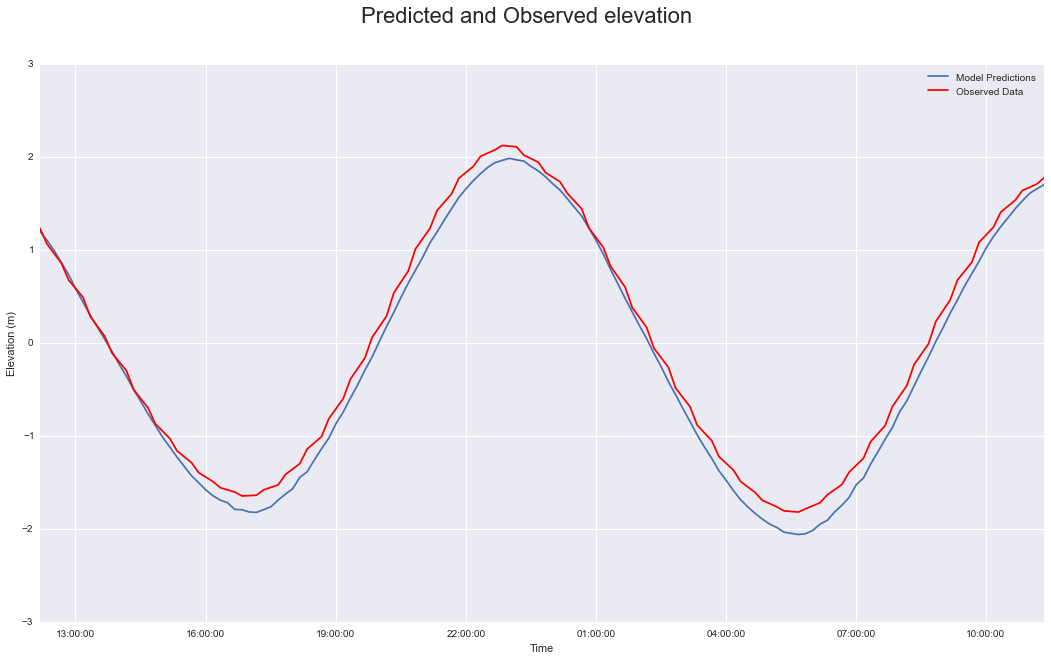

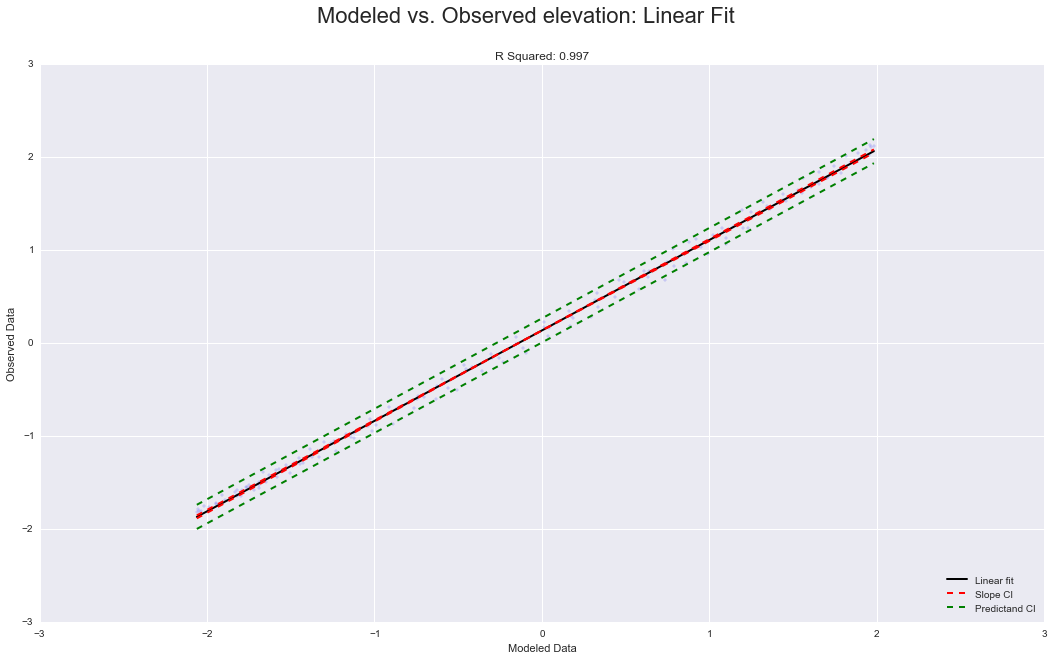

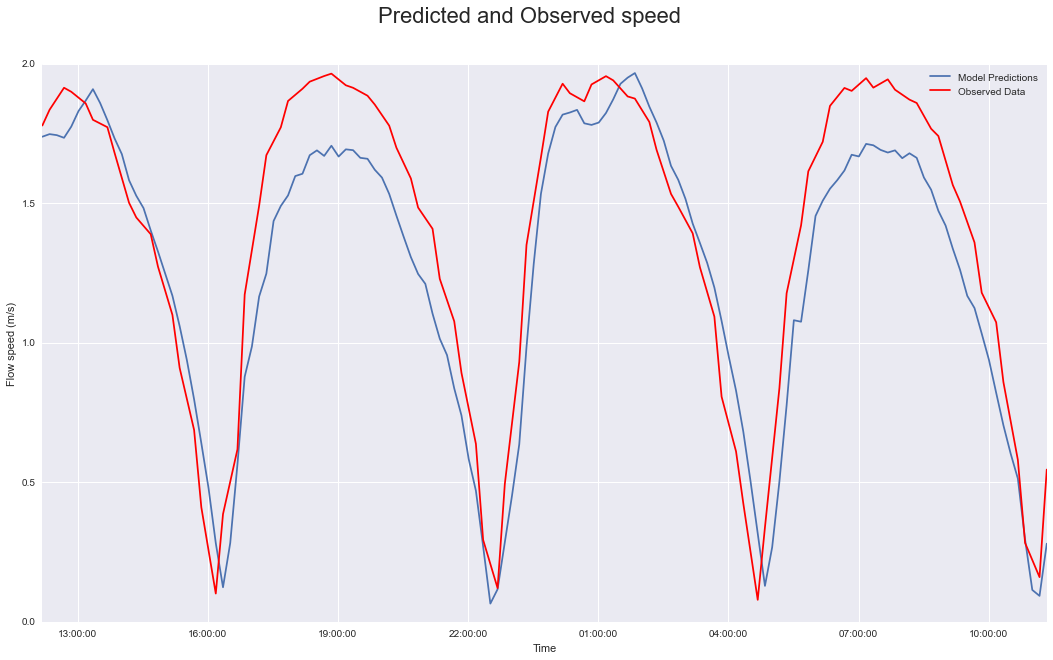

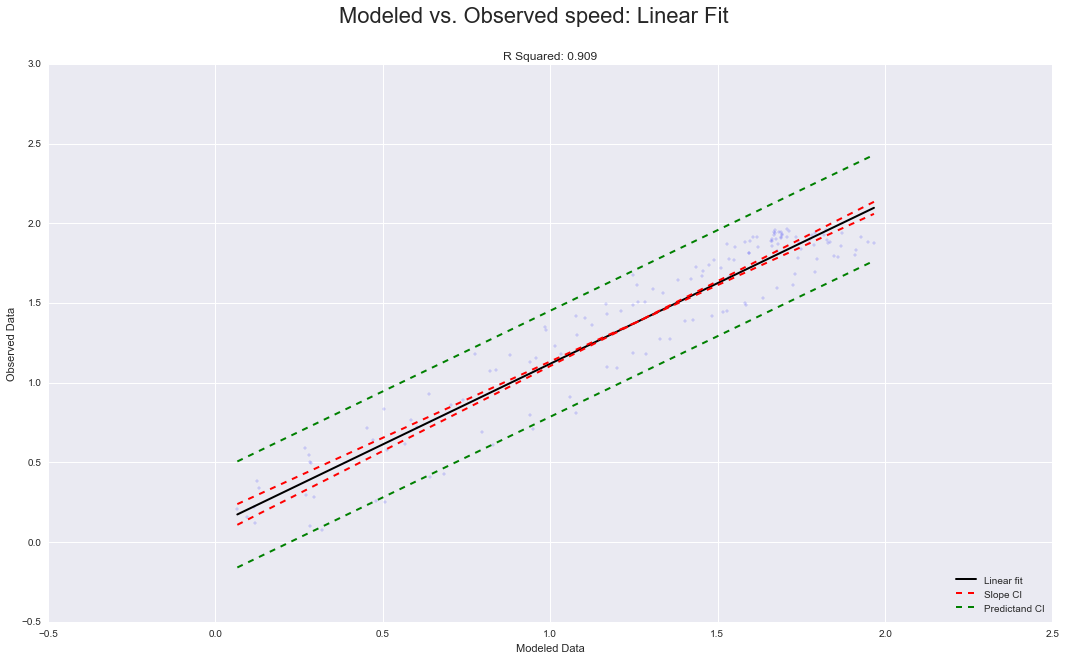

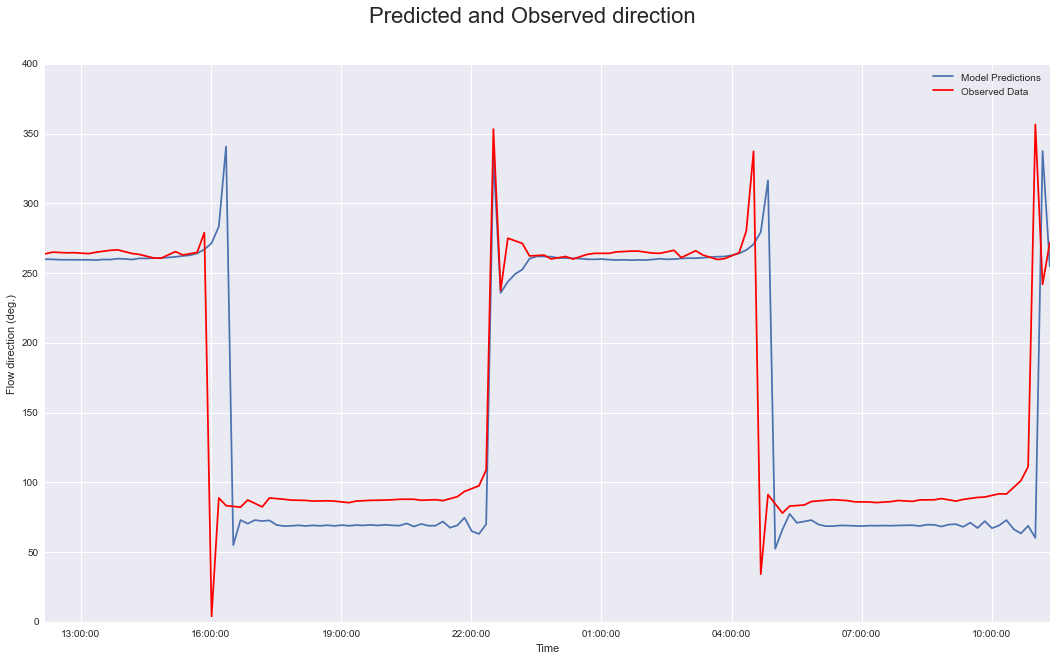

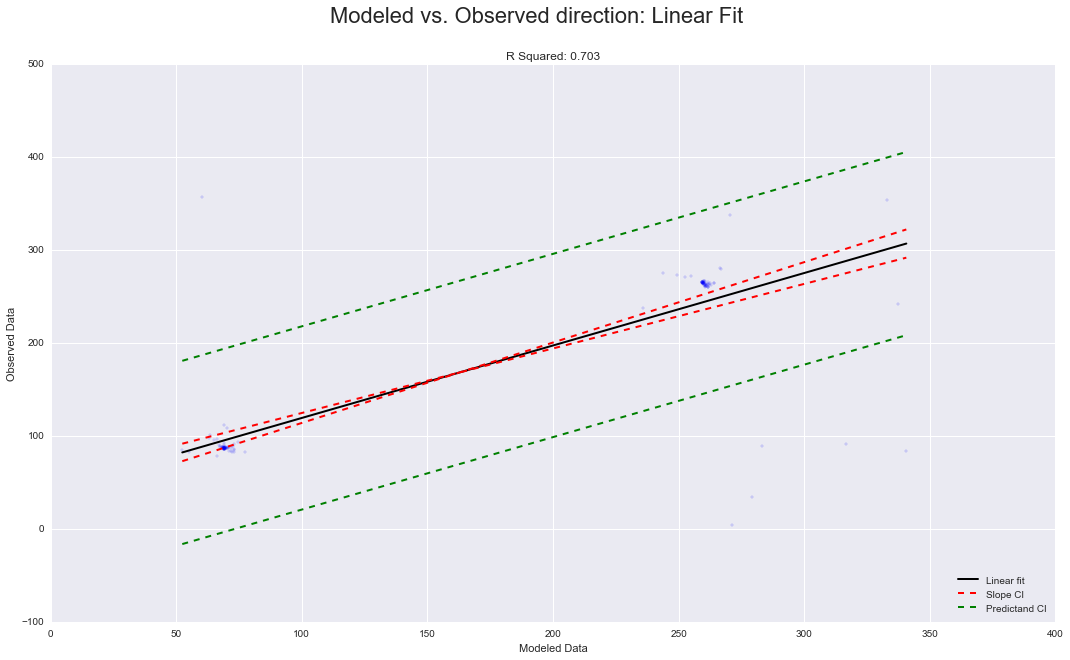

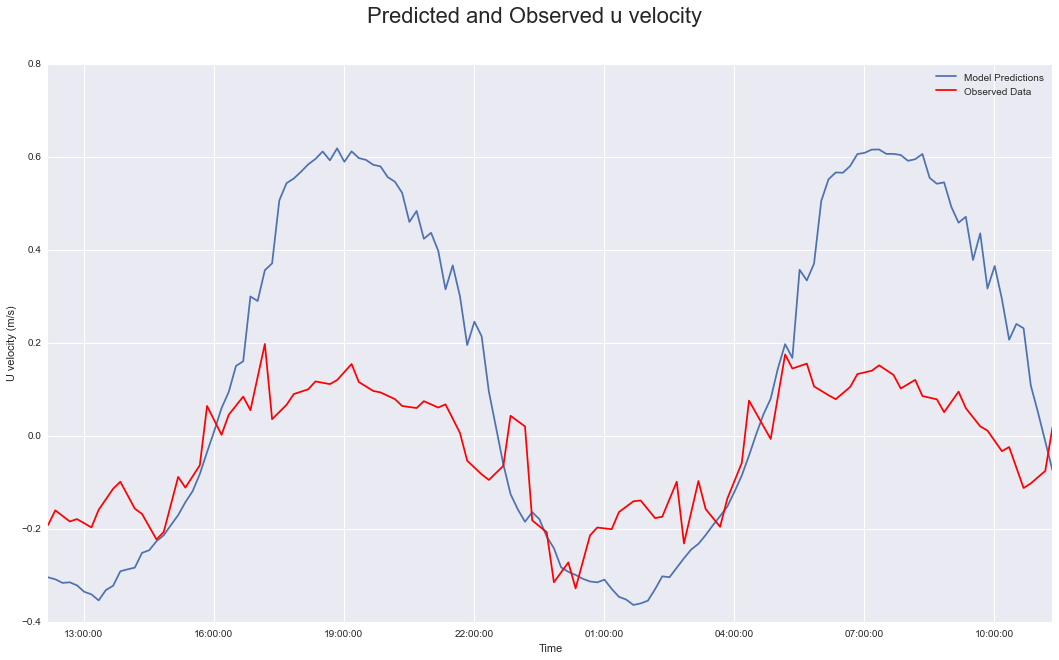

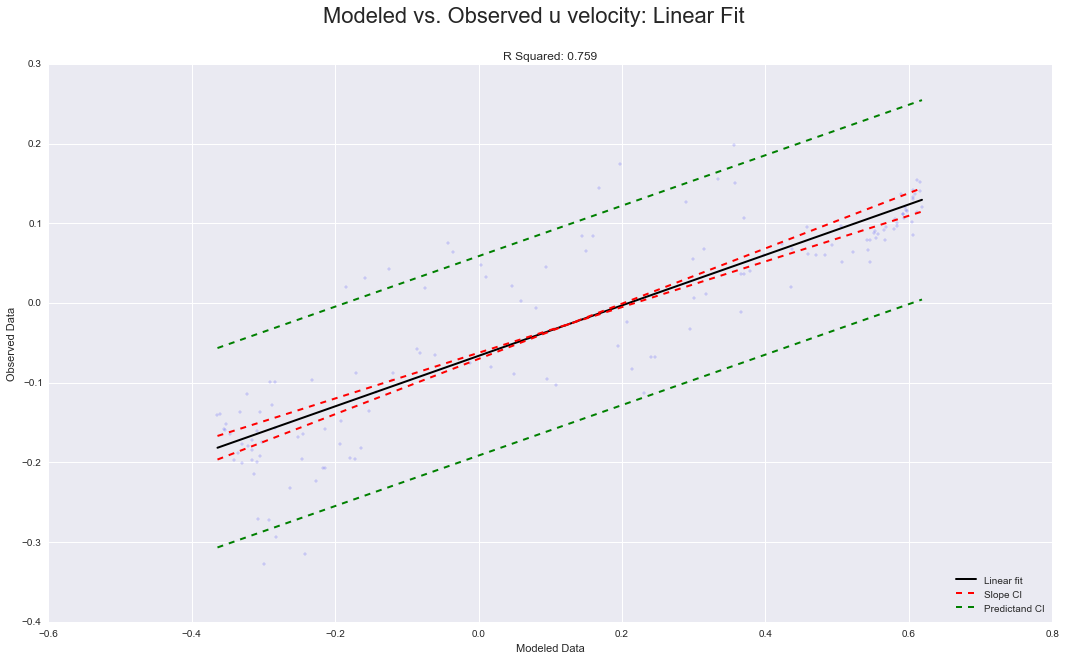

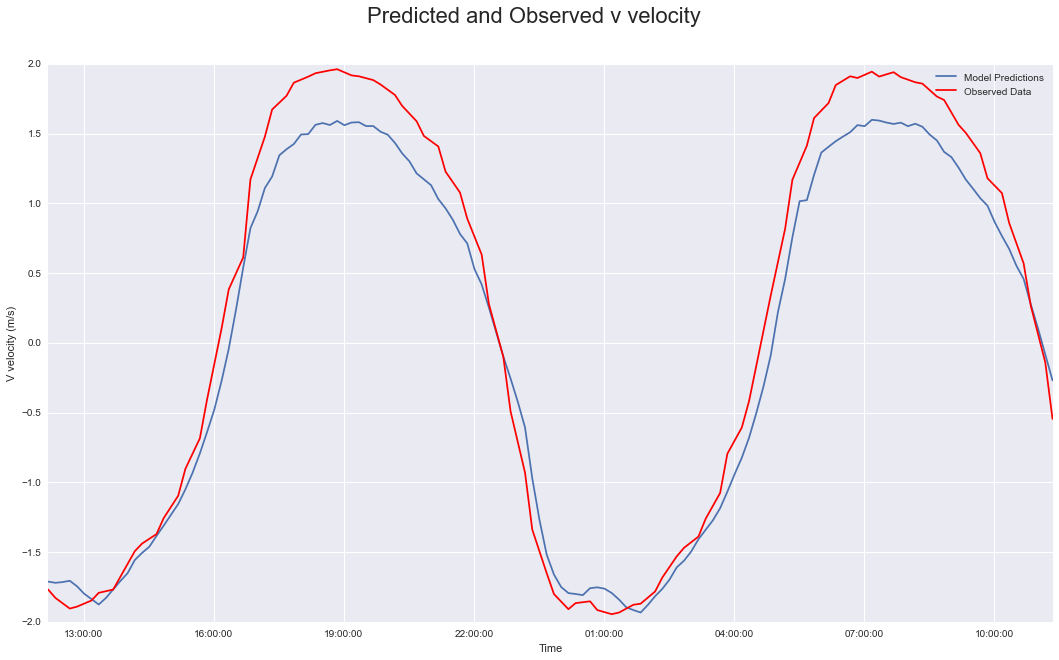

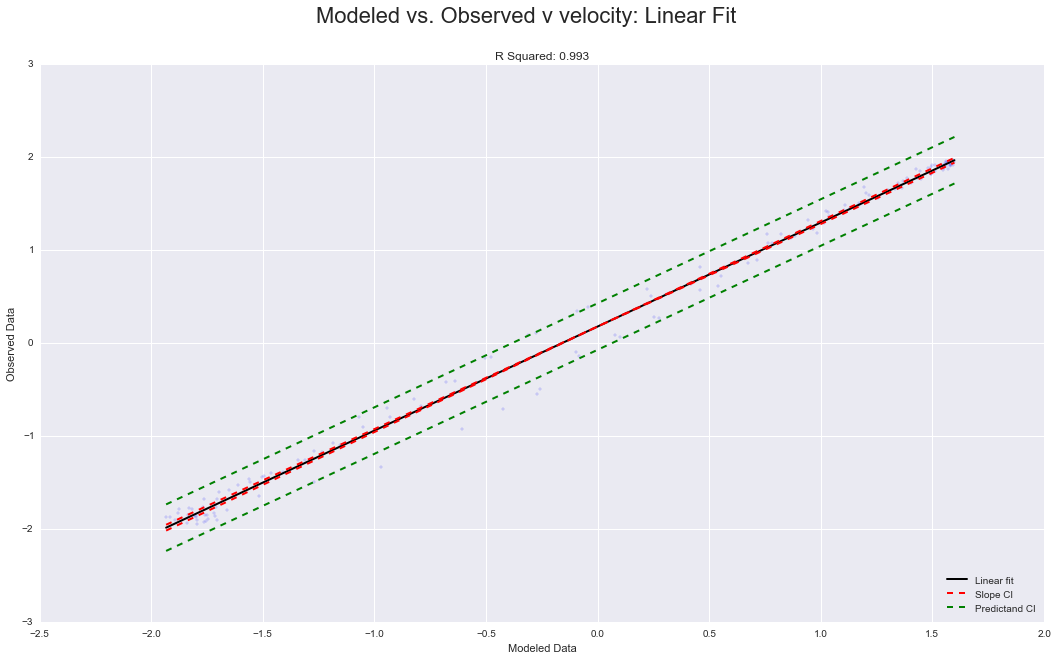

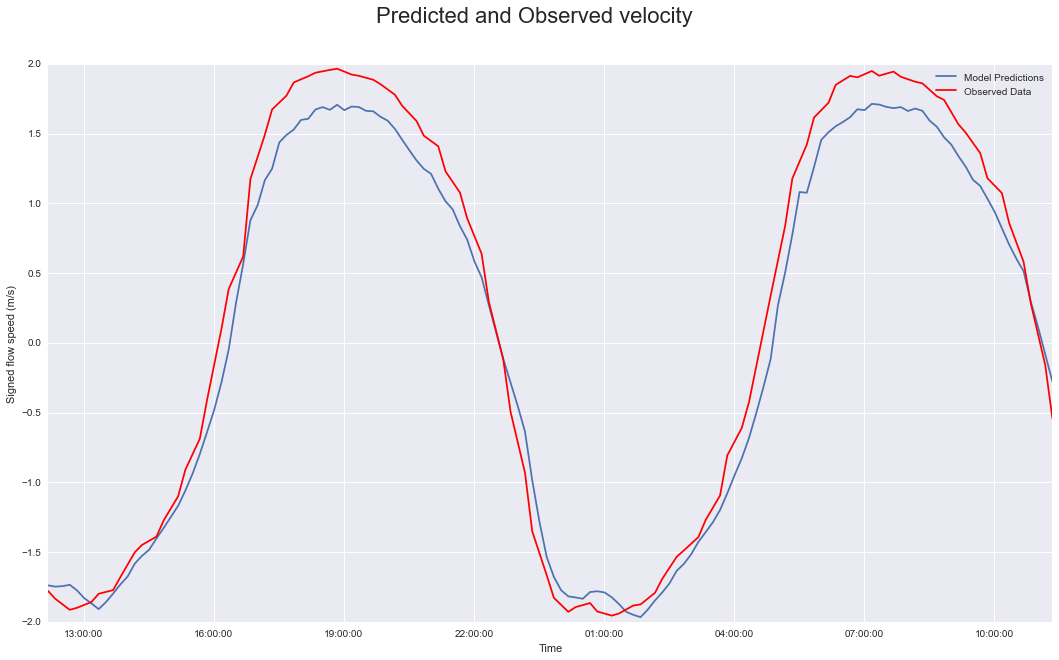

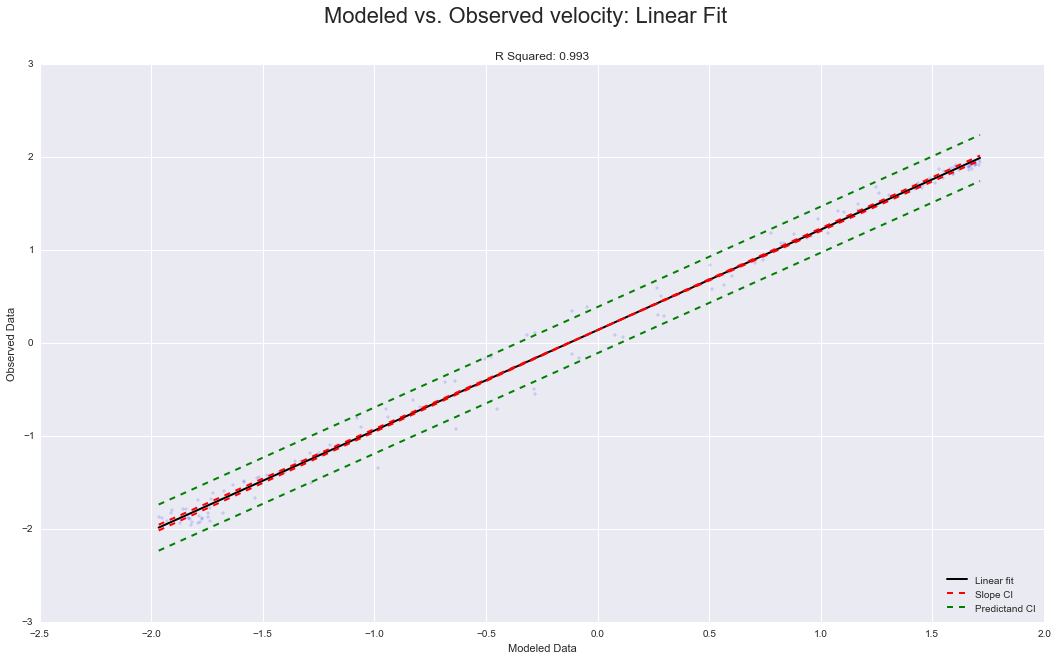

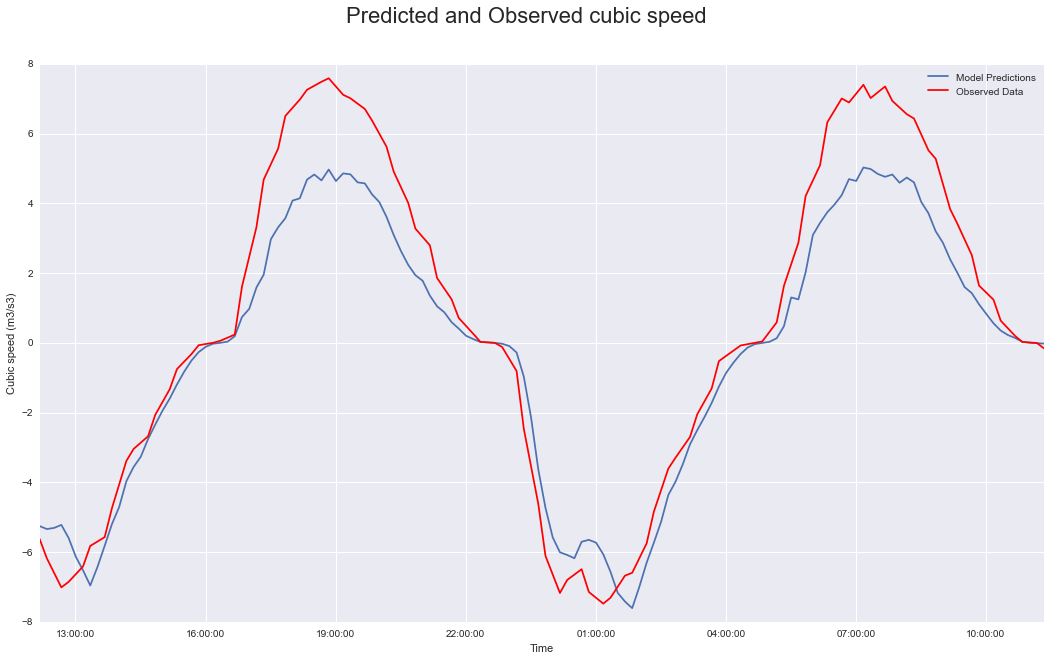

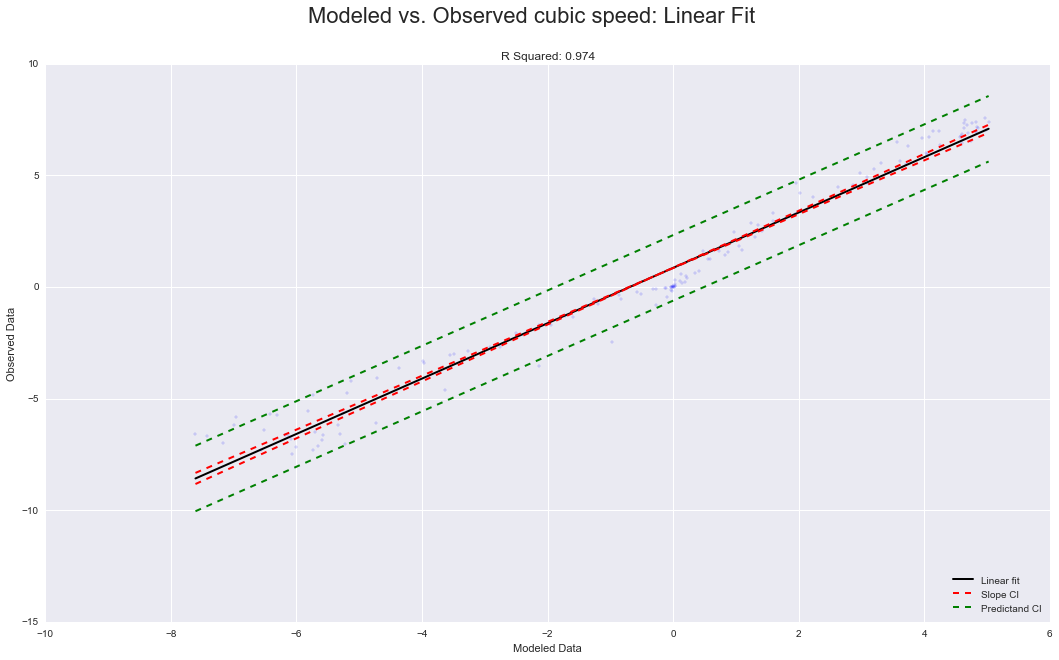

---Validation benchmarks---
                   MDPO   pbias  gear    r2   RMSE    NOF      CF ovORun  \
adcp_GP_01aug2013     0  -11.59  ADCP  1.00   0.16   0.00  100.00      +   
adcp_GP_01aug2013   300   -8.77  ADCP  0.91   0.21   0.00   45.00      -   
adcp_GP_01aug2013    40   40.95  ADCP  0.92  11.62   1.43   85.00      -   
adcp_GP_01aug2013   140 -216.11  ADCP  0.76   0.29  47.86   22.86      +   
adcp_GP_01aug2013    60   15.60  ADCP  0.99   0.27   0.00   84.29      -   
adcp_GP_01aug2013    20   12.81  ADCP  0.99   0.39   0.00   95.71      -   
adcp_GP_01aug2013     0 -149.50  ADCP  0.97   1.37   0.71   65.00      -   

                   phase     SI   bias  NRMSE  corr    POF   NSE  skill  \
adcp_GP_01aug2013   -180  -3.54   0.14   3.98  1.00   0.00  0.98   1.00   
adcp_GP_01aug2013   -180   0.15   0.12  11.04  0.95   1.43  0.86   0.96   
adcp_GP_01aug2013   -180   5.00  15.65  12.91  0.96   4.29  0.89   0.97   
adcp_GP_01aug2013   -180 -11.38  -0.15  56.01  0.87  11.43 -4.1

/usr/local/lib/python2.7/dist-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/usr/local/lib/python2.7/dist-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


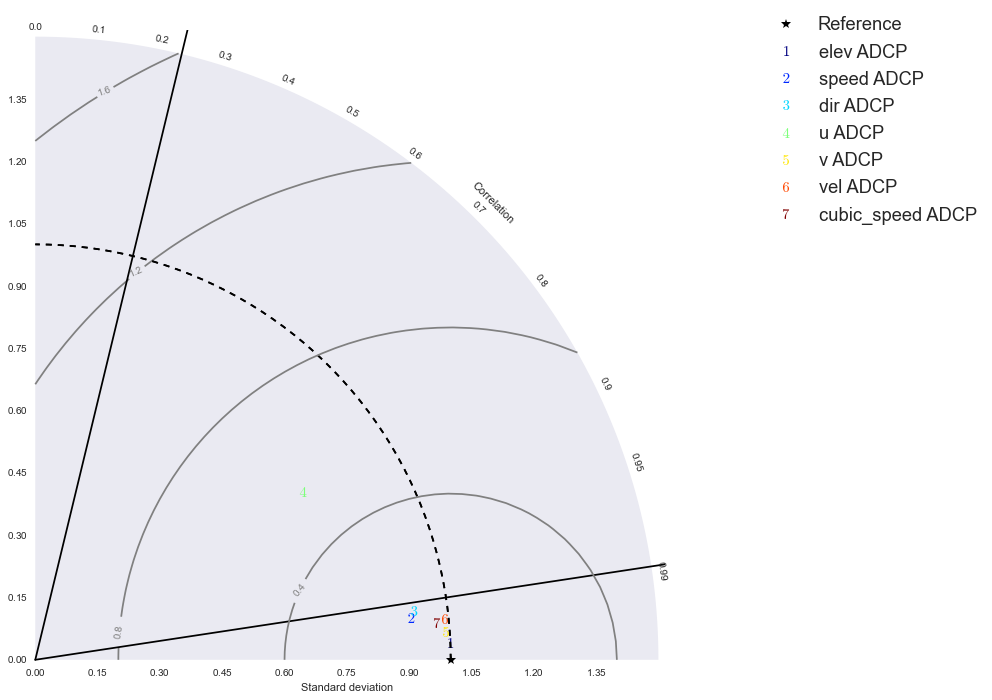

Station site: GP_130730_TA        
solve: 
matrix prep ... 
Solution ...
diagnostics...
Done.

solve: 
matrix prep ... 
Solution ...
diagnostics...
Done.

solve: 
matrix prep ... 
Solution ...
diagnostics...
Done.

solve: 
matrix prep ... 
Solution ...
diagnostics...
Done.



In [5]:
val1.validate_data(plot=True, save_csv=True, filename='test1')
val1.taylor_diagram()
val1.validate_harmonics(filename='test2')

***Exercise 4: ***
- Perform ***data validation*** of **val2** with **save_csv** option to True and **filename** to 'test3'. **Note**: it takes some time...
- ***Notice*** that folders **adcp_GP_01aug2013_bis**, **drifter_GP_01aug2013** and **tidegauge_GP_01aug2013** have been created.
- Plot the val2's ***taylor diagram***

***Answer: ***

---Validation benchmarks---
                   MDPO   pbias  gear    r2  RMSE    NOF      CF ovORun  \
adcp_GP_01aug2013     0    1.23  ADCP  1.00  0.12   0.00  100.00      +   
adcp_GP_01aug2013    10    6.04  ADCP  0.98  0.12   0.00   86.73      +   
adcp_GP_01aug2013    10    2.55  ADCP  0.99  6.54   0.89   97.32      -   
adcp_GP_01aug2013   340 -122.49  ADCP  0.95  0.21  48.21   10.71      +   
adcp_GP_01aug2013     0   -2.27  ADCP  1.00  0.10   0.00  100.00      +   
adcp_GP_01aug2013     0   -4.72  ADCP  1.00  0.24   0.00  100.00      +   
adcp_GP_01aug2013   130   39.91  ADCP  0.99  1.12   0.00   70.54      +   

                   phase    SI  bias  NRMSE  corr    POF   NSE  skill  \
adcp_GP_01aug2013   -180 -2.63  0.11   3.09  1.00   0.00  0.99   1.00   
adcp_GP_01aug2013   -180  0.09 -0.08   6.94  0.99   0.00  0.94   0.99   
adcp_GP_01aug2013   -180  0.50  7.06   7.27  0.99   0.00  0.98   1.00   
adcp_GP_01aug2013   -180  3.74 -0.05  43.72  0.97  26.79 -0.87   0.83   
adcp_G

/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


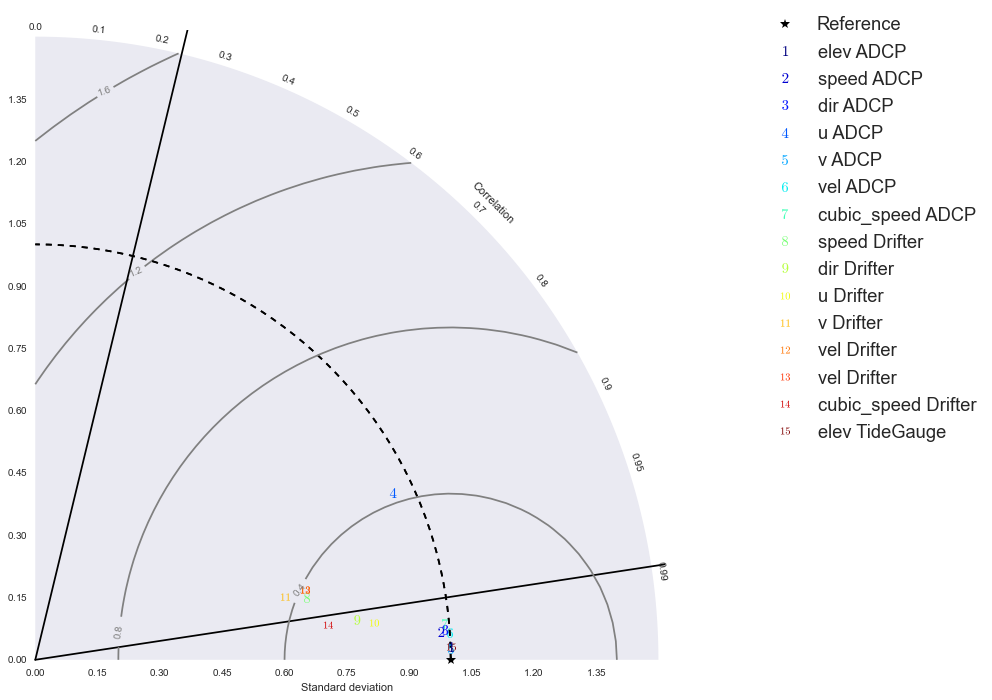

In [6]:
val2.validate_data(save_csv=True, filename='test3')
val2.taylor_diagram()

***Exercise 5: ***
- Perform ***data validation*** of **val3** with **save_csv** option to True and **filename** to 'test4'. **Note**: it takes some time...
- ***Notice*** that folders **adcp_GP_01aug2013_bis_bis** has been created.
- Plot the val3's ***benchmark map***

Depth from surface at which the validation will be performed: -5.0
---Validation benchmarks---
                   MDPO   pbias  gear    r2  RMSE    NOF      CF ovORun  \
adcp_GP_01aug2013     0    1.23  ADCP  1.00  0.12   0.00  100.00      +   
adcp_GP_01aug2013   300  -11.16  ADCP  0.94  0.21   0.00   42.48      -   
adcp_GP_01aug2013    40   12.89  ADCP  0.97  9.13   0.00   87.50      -   
adcp_GP_01aug2013   140 -267.69  ADCP  0.76  0.32  61.61   18.75      +   
adcp_GP_01aug2013    40   15.98  ADCP  1.00  0.27   0.00   83.04      -   
adcp_GP_01aug2013     0   12.67  ADCP  1.00  0.42   0.00  100.00      -   
adcp_GP_01aug2013     0  -67.35  ADCP  0.98  1.51   2.68   57.14      -   

                   phase      SI   bias  NRMSE  corr   POF   NSE  skill  \
adcp_GP_01aug2013   -180   -2.63   0.11   3.09  1.00  0.00  0.99   1.00   
adcp_GP_01aug2013   -180    0.15   0.16  11.17  0.97  0.00  0.85   0.96   
adcp_GP_01aug2013   -180    0.81  15.82  10.14  0.99  3.57  0.93   0.98   
adcp

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_base.py:1057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_base.py:1062: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


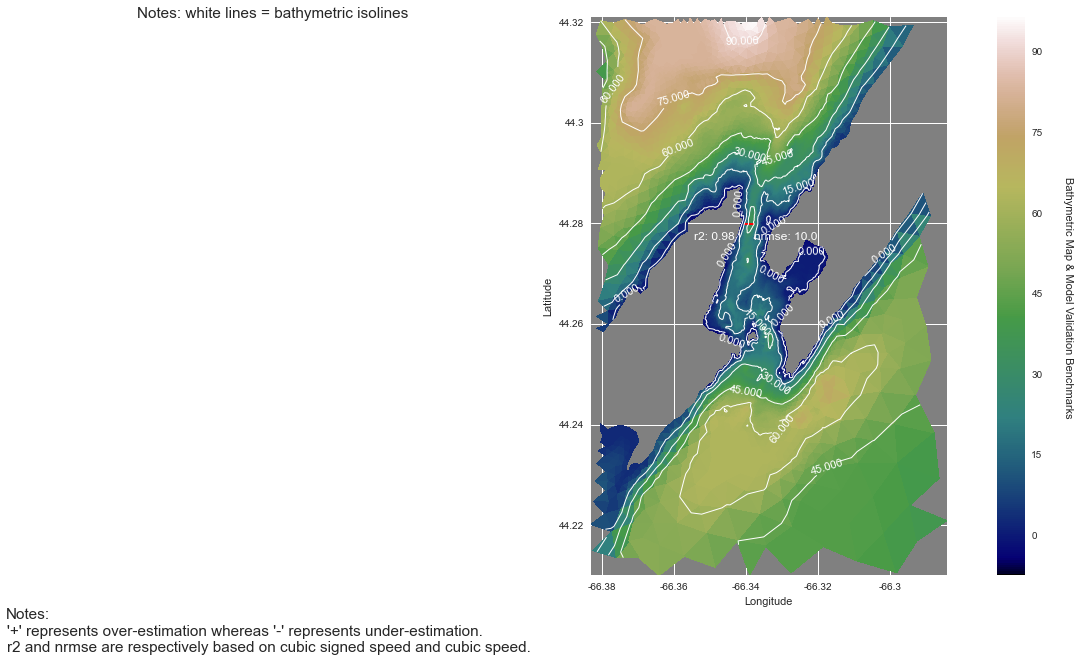

In [7]:
val3.validate_data(save_csv=True, filename='test4')
val3.benchmarks_map()

## 3. Validation benchmark definitions

This collection and analysis of a set of statistics mostly adhere to the benchmarks defined as standards for
hydrodynamic model validation by NOAA [1]. Additional statistics have been added to provide additional clarity on the skill of the model [2, 3, 4].

The present validation set is usually performed the following variables yet could be extended to other hydrodynamic quantities:
- Current speed (unsigned velocity)
- Current direction (between -180 and 180 degrees)
- Elevation (deviation from mean sea level)

***Benchmarks***

Following is a list of the statistics used to evaluate model skil
- RMSE: Root Mean Squared Error
- SD: Standard Deviation of Error
- CF(X): Central Frequency; percentage of error values that fall within the range (-X, X)
- POF(X): Positive Outlier Frequency; percentage of error values that fall above X
- NOF(X): Negative Outlier Frequency; percentage of error values that fall below -X
- MDPO(X): Maximum Duration of Positive Outliers; longest number of minutes during which consecutive errors fall above X
- MDNO(X): Maximum Duration of Negative Outliers; longest number of minutes during which consecutive errors fall below X
- Willmott Skill: A measure of model adherence to observed data between 0 and 1, with 0 being absolutely no adherence, and 1 being perfect.
- Phase: The phase shift (minutes) of model data that minimizes RMSE across a timespan of +/-3hr.
- R2 (i.e. coefficient of determination): Measure of the strength of the linear correlation between the model data and the observed data between 0 and 1, with 0 being no correlation, and 1 being perfect correlation.

The value of X is dependent on the variable and the statistic it's being used for. As defined here, X equals 10% of the data range. NOAA additionally defines limits on the values for determining the skill of the model. Accordingly, CF can be no lower than 90%, NOF/POF can be no higher than 1%, and MDPO/MDNO can be no longer than 24hr/1440min. ideally, the
Willmott Skill and R2 should be 1, and the phase should be 0.

***References***

[1] K. W. Hess, T. F. Gross, R. A. Schmalz, J. G. Kelley, F. Aikman and E. Wei, "NOS standards for evaluating
operational nowcast and forecst hydrodynamic model systems," National Oceanic and Atmospheric
Administration, Silver Srping, Maryland, 2003.

[2] K. Gunn and C. Stock-Williams, "On validating numerical hydrodynamic models of complex tidal flow,"
International Journal of Marine Energy, Vols. 3-4, no. Special, pp. 82-97, 2013.

[3] N. Georgas and A. F. Blumberg, "Establishing Confidence in Marine Forecast Systems: The Design and Skill
Assessment of the New York Harbor Observation and Prediction System, Version 3 (NYHOPS v3)," in 11th
International Conference on Estuarine and Coastal Modeling, Seattle, Washington, United States, 2010.

[4] Y. Liu, P. MacCready, H. M. Barbara, E. P. Dever, M. Kosro and N. S. Banas, "Evaluation of a coastal ocean
circulation model for the Columbia River plume in summer 2004," Journal of Geophysical Research, vol. 114,
no. C2, p. 1978–2012, 2009.

## 4. Bug patrol & steering committee

### 4.1. Bug report

As beta tester, your first assignement is to report bugs...yet not everything is a bug. The first thing to check before to report a bug is to verify that your version of *PySeidon* is up-to-date. The best way to keep up with the package evolution is to [***git***](http://git-scm.com/) to ***clone*** the repository, use ***pull*** to update it and ***re-install*** it if needed. 

The second thing to check before to report a bug is to verify that the bug is ***reproducible***. When running into a bug, double check that your inputs fit the description of the documentation then turn the ***debug flag on*** (e.g. *output = tidegaugeobject.function(inputs, debug=True)*) and submit the command again. If the error re-occurs then report it (i.e. copy entire error message + command and send it to package administrator)

### 4.2. Suggestions & critics

Your second role as beta-tester is to submit suggestions and critics to the developpers regarding the functioning and functionality of the package. Beta testing phase is the best opportunity to steer a project towards the applications you would like to be tackled...